# IBM Data Science Certificate Capstone Project

# Table of contents
1. [Business Problem](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
    1. [Data exploration](#dataexploration)
    2. [Geospatial analysis](#geo)
    3. [Geospatial analysis (Foursquare queries)](#four)
    4. [Cluster of neighborhoods](#cluster)
4. [Results](#results)
5. [Conclusion](#conclusion)
6. [Link to GitHub repository](#link)

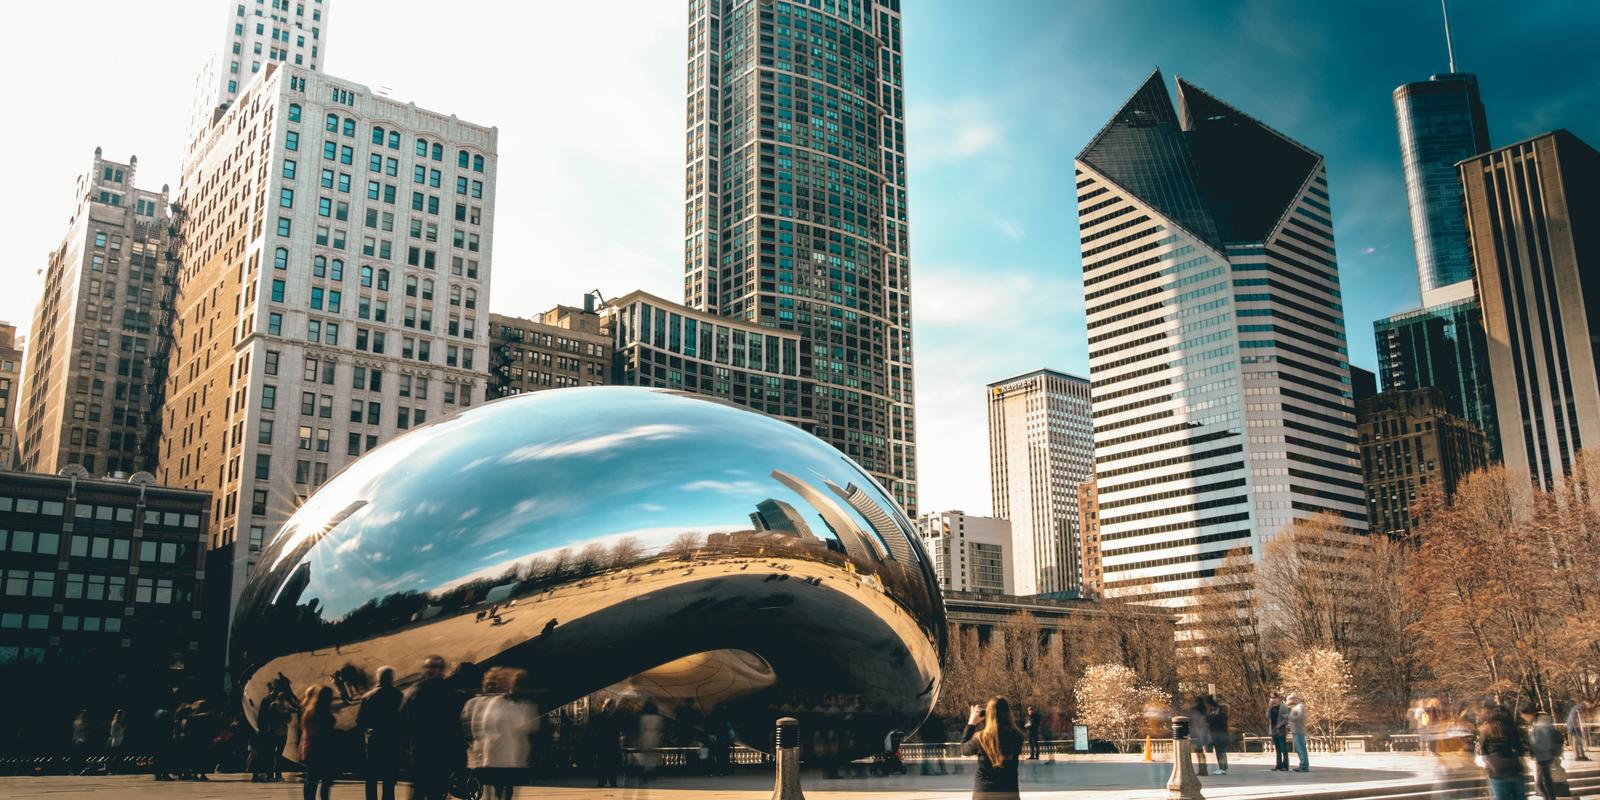

## Business Problem <a name="introduction"></a>

Main problem: Where should a restaurant be opened in the city of Chicago considering socioeconomic indicators and the current existing dining options?

Let's suppose that an investor plans to open a new restaurant in the city of Chicago, for which he seeks advice from a data scientist. The investor is not from Chicago and hence is not well acquainted with the area, with only a vague idea of where he could locate his new business. Additionaly, he isn't quite sure about what kind of food he should sell. As a data scientist, several aspects must be considered in order to recommend the best locations within the Chicago area, including the type of cuisine as a suggestion as well.


The main factors that need to be assessed in order to pinpoint the best possible restaurant locations are the following:

* Location's per capita income: The economic status of the Chicago neighborhoods can be evaluated to determine whether a zone is good or not to recieve a new business. An area with a low per capita income is less probable to represent a good market opportunity. Alternatively, neighborhoods where people have higher incomes are likely to offer a reliable business scenario.

* Location's population: A zone with high population or density indicators might favor the exposure of the business to the public, increasing the probability of attracting new clients.

* Competition among existing restaurants: The number of restaurants in an existing area should be determined to find if there is a high level of rivalry in the area. Choosing a place that doesn't have much competition will increase the business success probability.

* Type of existing restaurants: Related to the previous point, the kind of food sold at existing restaurant should be considered to determine what type of food should be sold in the new restaurant, avoiding unnecesary competition.

* Other social indicators: Factors such as age and unemploymet could also give an insight regarding the neighborhood's feasibility for the business.

## Data <a name="data"></a>
The required data to solve the business problem will be comprised of:

- Socioeconomic indicators (age, per capita income, unemployment) from the neighborhoods of Chicago. The dataset was used for a previous assignment in the certification and is provided by the City of Chicago. This information will give an insight about the location's social and economical receptiveness towards the new restaurant. Queries should be performed to find the locations with the highest income and population. Regarding the age factor, a place with a high younger population may also be preferred to enter the market more easily, as well as for creating loyal clients. Data regarding postal codes and community areas was also retrieved from U.S. government information.


- Geo-spacial information from Foursquare, which will indicate the position of current restaurants in the area as well as the type of food they sell. By mapping these locations, positions can be suggested for the new business where there currently are not much restaurants. The neighborhoods with a high number of restaurants, for instance, should be avoided. A place with a medium number of business could be considered.¶




In [1]:
#Chicago census, socioeconomic indicators data load.

import pandas as pd
si=pd.read_csv('https://ibm.box.com/shared/static/05c3415cbfbtfnr2fx4atenb2sd361ze.csv')
si.head()


,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [2]:
#Chicago ZIP codes coordinates

ci=pd.read_csv('https://docs.google.com/spreadsheets/u/0/d/1ujPzbrXX9-vt6SdYklBt9w8lrk_CWOAVjUXVJ3EsBpM/export?format=csv&id=1ujPzbrXX9-vt6SdYklBt9w8lrk_CWOAVjUXVJ3EsBpM&gid=0')
ci.head()


,ZIP,Latitude,Longitude
0,60601,41.885310,-87.622116
1,60602,41.883073,-87.629149
2,60603,41.880188,-87.625509
3,60604,41.878095,-87.628461
4,60605,41.867566,-87.617228


In [3]:
#Chicago community areas ZIP codes

co=pd.read_csv('https://docs.google.com/spreadsheets/u/0/d/1sq_mQ2b6gnFcsLBzmijKT9Obm95kZtKJnv0SQqhhQiI/export?format=csv&id=1sq_mQ2b6gnFcsLBzmijKT9Obm95kZtKJnv0SQqhhQiI&gid=0')
co.head()

,ZIP,COMMUNITY_AREA_NAME
0,60681,Near West Side
1,60680,Near West Side
2,60666,O'Hare
3,60664,Near West Side
4,60661,Loop


## Methodology <a name="methodology"></a>

To avoid working with an excess of geospatial data, a filter must be applied first to the census data. The data will be processed first to find the areas that have the highest per capita income, which represent the most attractive options for the investors. However, some algorithms can be applied to identify possible relationships (correlation) between the population and the per-capita income. This will help at identifying the target audience of the business.


### Data exploration <a name="dataexploration"></a>


In [4]:
#Get the first 10 communities with the highest income

si_income=si[['COMMUNITY_AREA_NAME','PER_CAPITA_INCOME ']]
si_income=si_income.sort_values(['PER_CAPITA_INCOME '], ascending=False).head(10)
si_income

,COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
7,Near North Side,88669
6,Lincoln Park,71551
31,Loop,65526
5,Lake View,60058
32,Near South Side,59077
4,North Center,57123
27,Near West Side,44689
11,Forest Glen,44164
23,West Town,43198
8,Edison Park,40959


In [5]:
#Get the first 10 communities with less unemployment

si_unemploy=si[['COMMUNITY_AREA_NAME','PERCENT AGED 16+ UNEMPLOYED']]
si_unemploy=si_unemploy.sort_values(['PERCENT AGED 16+ UNEMPLOYED'], ascending=True).head(10)
si_unemploy

,COMMUNITY_AREA_NAME,PERCENT AGED 16+ UNEMPLOYED
5,Lake View,4.7
32,Near South Side,4.9
6,Lincoln Park,5.1
4,North Center,5.2
31,Loop,5.7
8,Edison Park,6.5
23,West Town,6.6
11,Forest Glen,6.8
7,Near North Side,7.0
75,O'Hare,7.1


In [6]:
# Communities that appear in both of the previous queries (that is, they are in the highest 10 incomes per capita AND lowest 10 rates of unemployment)

df_merge=pd.merge(si_income,si_unemploy, how='inner')
df_merge

,COMMUNITY_AREA_NAME,PER_CAPITA_INCOME,PERCENT AGED 16+ UNEMPLOYED
0,Near North Side,88669,7.0
1,Lincoln Park,71551,5.1
2,Loop,65526,5.7
3,Lake View,60058,4.7
4,Near South Side,59077,4.9
5,North Center,57123,5.2
6,Forest Glen,44164,6.8
7,West Town,43198,6.6
8,Edison Park,40959,6.5


As shown, the communities that have the highest per capita income are also the ones with less unemployment rates.

*Regressions*

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Relationship between Per Capita Income and Unemployment. As seen below, there seems to be a negative non linear relationship, where lower levels of unemployment are related to highest per Capita Income. 

(0, 38.51292822336149)

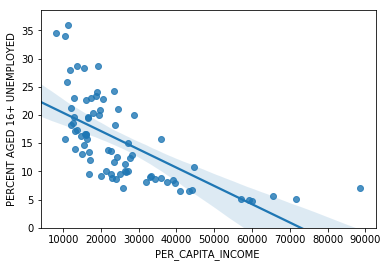

In [8]:
sns.regplot(x='PER_CAPITA_INCOME ', y='PERCENT AGED 16+ UNEMPLOYED', data=si)
plt.ylim(0,)

### Geospatial analysis <a name="geo"></a>

Given the previous data exploration, the neighborhoods/communities that must be analyzed in regards of the business case are the ones who belong to the two created tables (highest per capita and less unemployment). This previous pre-processing enabled data reduction, pre-filtering the possible neighborhoods and reducing the amount of work for the spacial analysis. Note that some of the selected neighborhoods have more than one postal code.

In [9]:
#merged dataframe with coordinates, ZIP codes, community areas and socioeconomic indicators of interest)  Note that some communities have more than one postal code
df4=pd.merge(df_merge,co, how='left')
df4=pd.merge(df4,ci)
df4.rename(columns={'COMMUNITY_AREA_NAME':'Neighbourhood'}, inplace=True)
df4

,Neighbourhood,PER_CAPITA_INCOME,PERCENT AGED 16+ UNEMPLOYED,ZIP,Latitude,Longitude
0,Near North Side,88669,7.0,60622,41.902172,-87.683337
1,West Town,43198,6.6,60622,41.902172,-87.683337
2,Near North Side,88669,7.0,60611,41.895700,-87.613775
3,Near North Side,88669,7.0,60610,41.906772,-87.632231
4,Lincoln Park,71551,5.1,60614,41.922714,-87.649577
5,Loop,65526,5.7,60661,41.883030,-87.644101
6,Loop,65526,5.7,60607,41.874930,-87.651596
7,Near South Side,59077,4.9,60607,41.874930,-87.651596
8,Loop,65526,5.7,60606,41.882066,-87.637349
9,Loop,65526,5.7,60605,41.867566,-87.617228


In [10]:
#get Chicago latitude and longitude
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

Solving environment: done

# All requested packages already installed.

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


In [11]:
#Get Chicago map to visualize the possible neighborhoods

# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df4['Latitude'], df4['Longitude'], df4['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

### Geospatial analysis (Foursquare queries) <a name="four"></a>


In [12]:
import requests
import lxml.html as lh
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Define credentials foursquare. The query will be performed to look only at food related venues, using the corresponding code for food.'4d4b7105d754a06374d81259'

CLIENT_ID = '3T1VHPU3JW1LHMID1FAIV0URXVVXLIEZTGUF5ZRCCGSNOJ0M' # your Foursquare ID
CLIENT_SECRET = 'NOX0XP04RFQL1PZHOZRCTSNOAO4UZINOU30IKDTTE0JOMLCJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#Get venues por all selected neighborhoods in Chicago

LIMIT = 40 # limit of number of venues returned by Foursquare API
food='4d4b7105d754a06374d81259'

def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            food,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
chicago_venues = getNearbyVenues(names=df4['Neighbourhood'],
                                   latitudes=df4['Latitude'],
                                   longitudes=df4['Longitude']
                                  )
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
chicago_onehot['Neighbourhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

#Get mean frequency occurence of venues per neighborhood
chicago_grouped = chicago_onehot.groupby('Neighbourhood').mean().reset_index()
chicago_grouped

Near North Side
West Town
Near North Side
Near North Side
Lincoln Park
Loop
Loop
Near South Side
Loop
Loop
Near South Side
Loop
Loop
Loop
Loop
Lake View
North Center
Near South Side
North Center
North Center
Forest Glen
Forest Glen
West Town
West Town
Edison Park


,Neighbourhood,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Brazilian Restaurant,Breakfast Spot,...,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Steakhouse,Sushi Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Forest Glen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Lake View,0.000000,0.096774,0.000000,0.032258,0.000000,0.032258,0.032258,0.032258,0.000000,...,0.032258,0.032258,0.000000,0.000000,0.000000,0.096774,0.000000,0.032258,0.032258,0.032258
2,Lincoln Park,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000
3,Loop,0.009009,0.054054,0.009009,0.018018,0.009009,0.004505,0.022523,0.000000,0.009009,...,0.045045,0.148649,0.013514,0.027027,0.009009,0.022523,0.018018,0.000000,0.013514,0.000000
4,Near North Side,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.071429,...,0.000000,0.035714,0.035714,0.000000,0.000000,0.035714,0.035714,0.000000,0.000000,0.000000
5,Near South Side,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,North Center,0.000000,0.069767,0.000000,0.046512,0.000000,0.023256,0.046512,0.023256,0.000000,...,0.023256,0.046512,0.000000,0.000000,0.000000,0.069767,0.000000,0.023256,0.023256,0.023256
7,West Town,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.045455,...,0.000000,0.181818,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
#Top 8 common restaurant venues per neighborhood

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = chicago_grouped['Neighbourhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Forest Glen,Hot Dog Joint,Food Truck,Vietnamese Restaurant,Gastropub,French Restaurant,Food Stand,Food Court,Fast Food Restaurant
1,Lake View,American Restaurant,Sushi Restaurant,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Noodle House,Diner,Vegetarian / Vegan Restaurant
2,Lincoln Park,Pizza Place,American Restaurant,Sushi Restaurant,Breakfast Spot,French Restaurant,Indonesian Restaurant,Japanese Restaurant,Greek Restaurant
3,Loop,Sandwich Place,Italian Restaurant,American Restaurant,Café,Salad Place,Mediterranean Restaurant,Food Truck,Donut Shop
4,Near North Side,Italian Restaurant,Pizza Place,American Restaurant,Café,Donut Shop,Deli / Bodega,Breakfast Spot,Chinese Restaurant
5,Near South Side,Food Truck,Café,American Restaurant,Fast Food Restaurant,Deli / Bodega,Greek Restaurant,Hot Dog Joint,New American Restaurant
6,North Center,Mexican Restaurant,Chinese Restaurant,Pizza Place,American Restaurant,Sushi Restaurant,Sandwich Place,Bakery,Diner
7,West Town,Sandwich Place,Pizza Place,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,Fried Chicken Joint,Donut Shop,Cuban Restaurant


### Cluster of neighborhoods <a name="cluster"></a>


In [22]:

# Clustering by 4 groups
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

chicago_grouped_clustering = chicago_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)


chicago_merged = df4

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

chicago_merged 

,Neighbourhood,PER_CAPITA_INCOME,PERCENT AGED 16+ UNEMPLOYED,ZIP,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Near North Side,88669,7.0,60622,41.902172,-87.683337,2.0,Italian Restaurant,Pizza Place,American Restaurant,Café,Donut Shop,Deli / Bodega,Breakfast Spot,Chinese Restaurant
1,West Town,43198,6.6,60622,41.902172,-87.683337,2.0,Sandwich Place,Pizza Place,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,Fried Chicken Joint,Donut Shop,Cuban Restaurant
2,Near North Side,88669,7.0,60611,41.895700,-87.613775,2.0,Italian Restaurant,Pizza Place,American Restaurant,Café,Donut Shop,Deli / Bodega,Breakfast Spot,Chinese Restaurant
3,Near North Side,88669,7.0,60610,41.906772,-87.632231,2.0,Italian Restaurant,Pizza Place,American Restaurant,Café,Donut Shop,Deli / Bodega,Breakfast Spot,Chinese Restaurant
4,Lincoln Park,71551,5.1,60614,41.922714,-87.649577,0.0,Pizza Place,American Restaurant,Sushi Restaurant,Breakfast Spot,French Restaurant,Indonesian Restaurant,Japanese Restaurant,Greek Restaurant
5,Loop,65526,5.7,60661,41.883030,-87.644101,2.0,Sandwich Place,Italian Restaurant,American Restaurant,Café,Salad Place,Mediterranean Restaurant,Food Truck,Donut Shop
6,Loop,65526,5.7,60607,41.874930,-87.651596,2.0,Sandwich Place,Italian Restaurant,American Restaurant,Café,Salad Place,Mediterranean Restaurant,Food Truck,Donut Shop
7,Near South Side,59077,4.9,60607,41.874930,-87.651596,3.0,Food Truck,Café,American Restaurant,Fast Food Restaurant,Deli / Bodega,Greek Restaurant,Hot Dog Joint,New American Restaurant
8,Loop,65526,5.7,60606,41.882066,-87.637349,2.0,Sandwich Place,Italian Restaurant,American Restaurant,Café,Salad Place,Mediterranean Restaurant,Food Truck,Donut Shop
9,Loop,65526,5.7,60605,41.867566,-87.617228,2.0,Sandwich Place,Italian Restaurant,American Restaurant,Café,Salad Place,Mediterranean Restaurant,Food Truck,Donut Shop


In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighbourhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



## Results <a name="results"></a>

The most relevant results are shown below for reference, although they have been already included in the methodology section.

Unemployment rate was found lower at high values of Per Capita Income.


(0, 38.5306677589837)

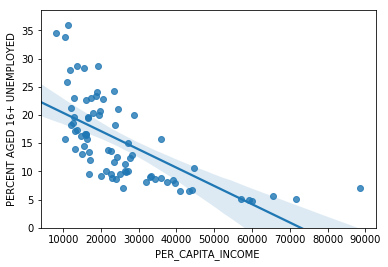

In [38]:
sns.regplot(x='PER_CAPITA_INCOME ', y='PERCENT AGED 16+ UNEMPLOYED', data=si)
plt.ylim(0,)

The following list corresponds to the filtered neighborhoos based on the socioeconomic indicators.

In [35]:
df_merge['COMMUNITY_AREA_NAME'].head(10)

0    Near North Side
1       Lincoln Park
2               Loop
3          Lake View
4    Near South Side
5       North Center
6        Forest Glen
7          West Town
8        Edison Park
Name: COMMUNITY_AREA_NAME, dtype: object

The next table indicates the number of restaurants located in each neighborhood as well as the type of food that is served at each one of them.

In [46]:
chicago_onehot.groupby(['Neighbourhood']).sum()

,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Brazilian Restaurant,Breakfast Spot,Burger Joint,...,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Steakhouse,Sushi Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Forest Glen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lake View,0,3,0,1,0,1,1,1,0,0,...,1,1,0,0,0,3,0,1,1,1
Lincoln Park,0,2,0,0,0,0,0,0,2,1,...,0,0,0,0,0,2,0,0,0,0
Loop,2,12,2,4,2,1,5,0,2,6,...,10,33,3,6,2,5,4,0,3,0
Near North Side,0,2,0,0,0,0,1,0,2,1,...,0,1,1,0,0,1,1,0,0,0
Near South Side,0,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
North Center,0,3,0,2,0,1,2,1,0,0,...,1,2,0,0,0,3,0,1,1,1
West Town,0,0,0,0,0,0,1,0,1,0,...,0,4,1,0,0,0,0,0,0,0


## Discussion <a name="conclusion"></a>


The first step of the methodology suggests that the chosen location must be in one of the following Community Areas:Forest Glen, Lake View, Lincoln Park, Loop, Near, North Side, Near South Side, North Center or West Town. All of these locations have a high Per Capita Income, which means that, in comparison with the rest of the neighborhoods of Chicago, the population in this areas has a greater purshasing power. By starting a business with this conditions, the probability of earning more profit is greater. As discovered in the methodology, an expected correlation was found between the Per Capita Income and unemployment rates, showing a non linear relationship. This relation may be somewhat obvious but can still give an insight of the neighborhood's circumstances and support the decision of choosing one of these areas. However, it is also important to recognize that this is only one possible method to narrow out data, other strategies may be implemented using other socioeconomic factors. The per capita income of the population may not be completely related to the purshasing power of the citizens, specially given the relatively small costs in the restaurant market, this indicators may suit better other type of businesses such as real-state or automovile adquisition, where purshase values are grater.

The Foursquare queries were efficient at locating competition within the selected areas. By using the correct search terms, data was retrieved succesfully from the geo-information servers. According to the information, most of the prospect areas didn't have a big number of restaurants within the zone. The next table shows a sum of the total number of restaurants per Community Area, without considering the type of food.



In [60]:
r=chicago_onehot.groupby(['Neighbourhood']).sum()
r.sum(axis=1)

Neighbourhood
Forest Glen          2
Lake View           31
Lincoln Park        15
Loop               222
Near North Side     28
Near South Side     16
North Center        43
West Town           22
dtype: int64

The table indicates that the zone with the least competition is Forest Glen. The rest of the locations have averaged values, with the exception of Loop, whose total number of restaurants is extremely high (222). Because of this, the community Loop wouldn't be recommended. A weighted table could be created by combining the total sum of restaurants, the per capita income and the rate of unemployment to select a final location. Nonetheless, this type of approach seems quite meaningless as the Communities generally offer similar values. In terms of the type of food that should be sold, the table shown before portraits perfectly which kind of foods are not sold in the area. The less common ones are Brazilian and Thai food, which could represent good business opportunities. 

## Conclusion <a name="conclusion"></a>

*Conclusions regarding the methodology:*

The first filter executed over the original neighborhood's dataframe reduced the location options by almost an 85%. This step involves a great improvement of the methodology as it manages to filter the amount of required information for the following steps. The geospatial methods were carried out quickly and efficiently due to the small amount of data that had to be processed in comparison to the raw datasets. Working with data that won't represent any change in the outcome should be avoided. 
The regression tools were also useful to quickly spot patterns and relationships between the data, specifically the socioeconomic indicators. More graphs could be generated in order to further explore the data.

The geospatial information, as well as the results, depend largely on the quality and quantity of the data provided by Foursquare. It came to my attention that the outcomes from the queries seemed rather incomplete, or at least had small magnitude values. For instance, the total number of restaurants at the Community Forest Glen was just 2, which seems rather unaccurate. A thorough research should be performed to understand the kind of information that Foursquare is providing, with the aim of complementing the data with other sources if necessary. The exercise, nonetheless, illustrates how simple it is to access information through APIs. Assuming that the Fourthsquare information is accurate, then the predictions should be accurate as well.



*Conclusions regarding the results (business problem solution):*

The final recommendation to the investor would be to personally choose one of these locations: Forest Glen, Lake View, Lincoln Park, Near, North Side, Near South Side, North Center or West Town. Likewise, the generated tables could also aid in the type of restaurant, in this case the least rivaled foods were Brazilian and Thai, although it highly depends in the chosen neighborhood. The decision would then rely also on other factors that were not considered in this analysis such as rental of the restaurant space, transportation facilities etc.


## Link to GitHub<a name="link"></a>
